<a href="https://colab.research.google.com/github/brunnabrito/Alura/blob/main/PS_Petlove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='purple' style='font-size: 30px;'>Analise de Churn da Pet Love no ano de 2020</font>
<hr style='border: 2px solid black;'>

# **1 Introdução**

## **1.1 O problema**

A equipe de assinaturas tem como objetivo reduzir a perda de assinantes. 

O conceito de “Churn” refere-se a perda de qualquer usuário que assinou o serviço de assinatura da Petlove e o cancelou em algum momento após a contratação.

Ao analisar os dados dos últimos meses, apesar de todas as melhorias de usabilidade da plataforma, o churn vem aumentando.

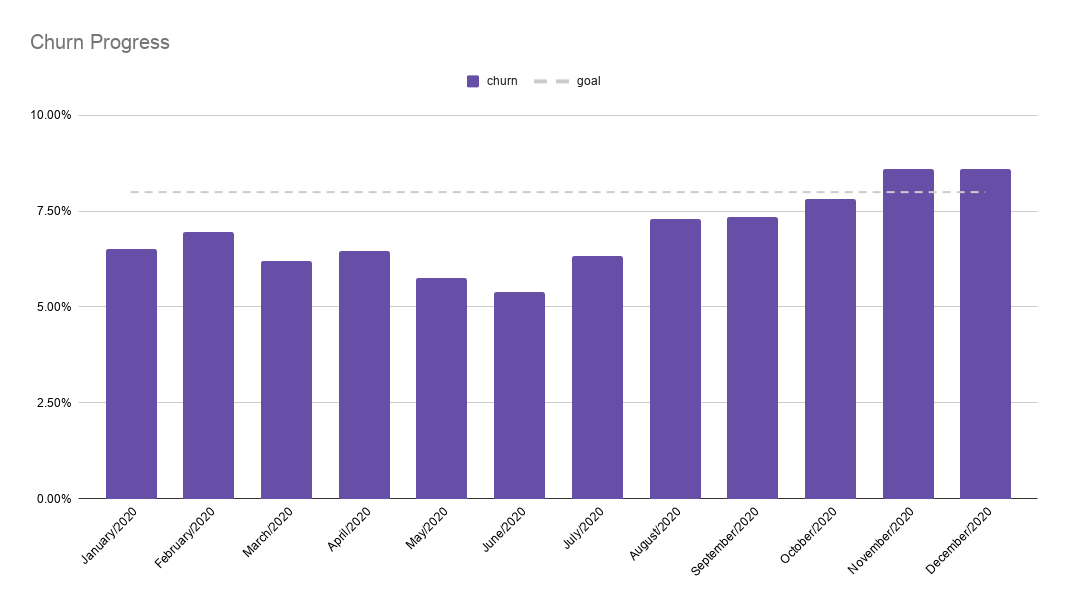

# **2 Entendendo os dados**

## **2.1 Importando as bibliotecas**


**Eixo base**

* NumPy: Biblioteca de manipulação de arrays multidimensionais de alta performance, possui diversas funções matemáticas e estatísticas.

* Pandas: Principal biblioteca de manipulação e análise de dados. Possui diversos métodos para agrupar, filtrar, manipular, limpar e combinar dados de forma simples.


**Data Visualization**

* Matplotlib: O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. 

* Seaborn: O Seaborn é uma biblioteca de visualização de dados do Python baseado no Matplotlib. Ele provê uma interface de alto nível para construção de gráficos estatísticos atrativos e informativos.

In [229]:
# Carregando os pacotes do Python necessários 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **2.2 Carregando os dados**

In [230]:
data = pd.read_csv('https://raw.githubusercontent.com/petlove/vagas/master/data/bi-analysis/data-test-analytics.csv')

## **2.3 Descrevendo os dados**

Nessa etapa os dados são descritos com objetivo de conhecermos seu formato, os tipos de variáveis (numéricas ou categóricas), bem como aspectos gerais úteis ao entendimento geral do problema.

In [231]:
# Conhecendo o formato do dataset.

data.shape

(10000, 20)

Em uma análise inicial percebe-se que o dataset apresenta um total de 10000 linhas, entradas ou observações, bem como um total de 20 colunas

In [232]:
# Conhecendo as varíaveis e seus tipos.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

**Dicionário das variáveis**

* `Column` - Description
* `id` - Identificação do cliente
* `created_at` - Data de criação da assinatura
* `updated_at` - Data da última modificação da assinatura
* `deleted_at` - Data de cancelamento da assinatura
* `name_hash` - Nome do usuário (criptografado)
* `email_hash` - Email (criptografado)
* `address_hash` - Endereço (criptografado)
* `birth_date` - Data de aniversário do cliente
* `status` - Status da assinatura
* `version` - Versão da assinatura
* `city` - Cidade do cliente
* `state` - Estado do cliente
* `neighborhood` - Bairro do cliente
* `last_date_purchase` - Data do último pedido que ocorreu pela assinatura
* `average_ticket` - Média de gasto por pedido
* `items_quantity` - Média de itens na assinatura
* `all_revenue` - Total de receita realizado pelo cliente
* `all_orders` - Total de pedidos realizado pelo cliente
* `recency` - Tempo desde a última compra do cliente
* `marketing_source` - Canal de marketing que converteu a assinatura


## **2.4 Estatísticas Descritivas**

Agora que já conhecemos a estrutura de nossos dados, passamos para etapa de identificação da qualidade de nossos dados, por meio da aplicação de técnicas de estatística descritiva, com especial atenção para identificação de valores faltantes, presença de outliers, dentre outras questões relevantes nesta fase inicial.

In [233]:
# Cálculo do percentual de dados faltantes no Dataset.

(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

deleted_at            0.9495
id                    0.0000
state                 0.0000
recency               0.0000
all_orders            0.0000
all_revenue           0.0000
items_quantity        0.0000
average_ticket        0.0000
last_date_purchase    0.0000
neighborhood          0.0000
city                  0.0000
created_at            0.0000
version               0.0000
status                0.0000
birth_date            0.0000
address_hash          0.0000
email_hash            0.0000
name_hash             0.0000
updated_at            0.0000
marketing_source      0.0000
dtype: float64

In [234]:
data['deleted_at'].count()

505

**Quanto à questão de dados faltantes, em uma breve verificação podemos identificar que:**

* A coluna **`deleted_at`** que motra a Data de cancelamento da assinatura possui 94,95% dos seus valores faltantes. Este é o percentual de usuários ativos desta amostra.

* 505 foram o total de cancelamentos.

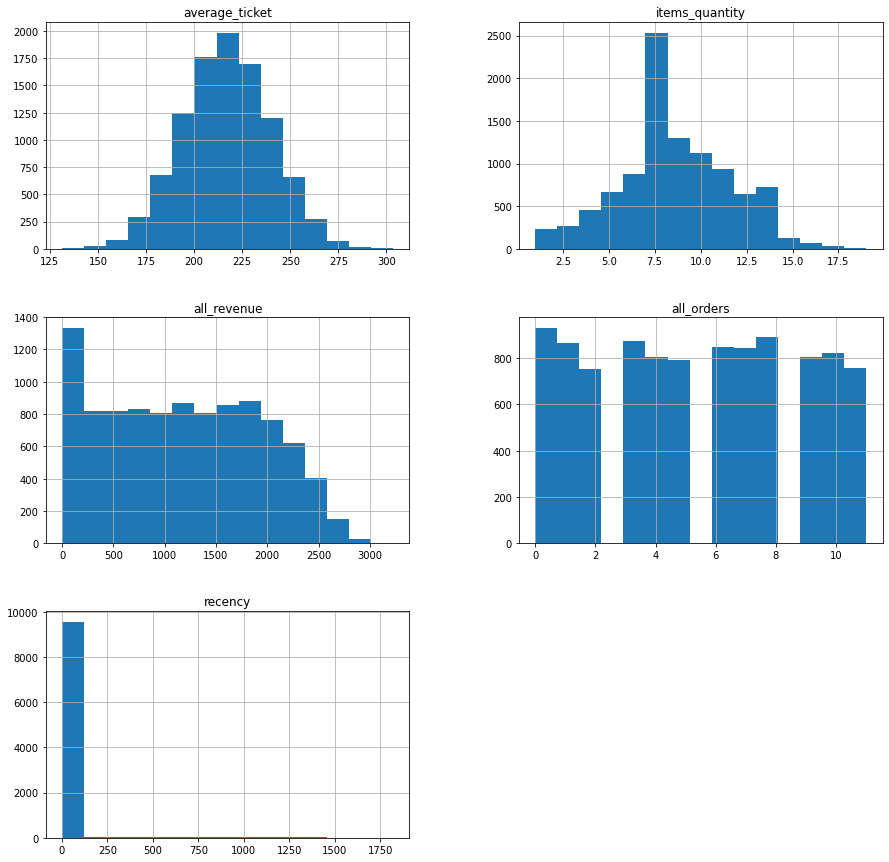

In [235]:
# Contrução dos histogramas das variáveis do dataset.

data.hist(bins=15, 
          figsize=(15,15), 
          grid=True
          );

**Quanto à questão da presença de outliers, em uma rápida análise podemos identificar que:** 

Pela distribuição dos histogramas verificamos uma uniformidade dos dados e não temos indícios de presença de grandes *outliers*, exceto na variável `regency` que será analisada mais de perto. 

Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`

* Plotar `boxplots` para a variável.


In [236]:
data.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900
std,22.757213,3.02604,763.141973,3.457577,175.723276
min,131.378672,1.00000,0.000000,0.000000,1.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000


**Quanto ao resumo das estatísticas, das variáveis numéricas do dataset, podemos verificar que:**

* O tempo desde a última compra do cliente (**`recency`**) possui 75% dos valores abaixo de 39, porém seu valor máximo é 1820.

* O desvio padrão é muito superior à média, indicando grande dispersão do tempo de compra.

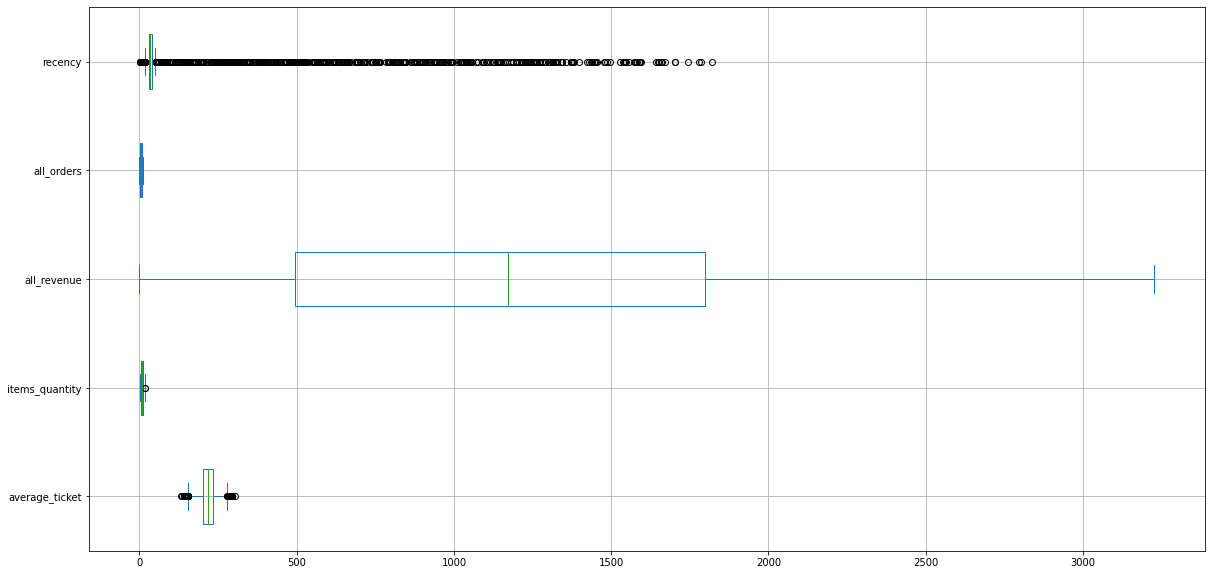

In [237]:
# Construção do Boxplot

data.plot(kind='box', vert=False, figsize=(20, 10))
plt.grid(True)
plt.show()



In [238]:
# Verificar a quantidade de valores acima de 67 dias (média) para variável recency.

print("recency: valores acima de 67:")
print(f"{len(data[data.recency > 67])} entradas")
print(f"{(len(data[data.recency > 67]) / data.shape[0])*100}%")

recency: valores acima de 67:
472 entradas
4.72%


**Quanto à construção dos Boxplots para verificar a presença de outliers, podemos verificar que:**

* Considerando-se a variável **recency** inicialmente havia uma suspeita de presença de outliers

* Entretanto que mesmo havendo valores muito superiores à média estes dados serão mantidos, pois numa estratégia de retenção ou conversão eles podem ser alvos de um plano de ação. Já que é menos custoso trabalhar com quem já conhece a marca do que apresentar a novos clientes. 

# **3 Preparação e limpeza dos dados**

Nesta etapa estaremos limpando os dados, integrando os dados, formatando os dados, construindo novos dados, para enfim, selecionar os dados que serão utilizados na construção de nosso modelo (análise exploratória de dados).

In [353]:
# Fazer a cópia de segurança para um novo dataset.

data_clean = data.copy()

## **3.1.Limpeza dos Dados**

Buscou-se remover as variáveis referente à identificação do usuário pois não são determinantes para o resultado final desta análise, porém será mantido o id pois se for preciso poderemos fazer um join posteriormente para utilizar os dados em campanhas.


In [354]:
data_clean.drop(columns = ['name_hash','email_hash', 'address_hash'], inplace=True)

## **3.2 Convertendo valores**

Nesta etapa vamos converter as variaveis de data para o formato datetime

In [355]:
data_clean['created_at'] = pd.to_datetime(data_clean['created_at'])
data_clean['updated_at'] = pd.to_datetime(data_clean['updated_at'])
data_clean['deleted_at'] = pd.to_datetime(data_clean['deleted_at'])
data_clean['last_date_purchase'] = pd.to_datetime(data_clean['last_date_purchase'])
data_clean['birth_date'] = pd.to_datetime(data_clean['birth_date'])

## **3.3 Criando colunas úteis**

Nesta etapa vamos criar colunas úteis à análise

In [359]:
# verificando a quantidade de dias que o usuário ficou ativo e atribuindo uma nova coluna ao df

total = data_clean['deleted_at'] - data_clean['created_at']
data_clean['total'] = total

In [360]:
# convertendo para numerico

data_clean['total'] = data_clean.total.apply(lambda x: x.days)

In [361]:
data_clean.sort_values(by=['created_at'], inplace=True)

## **3.4 Conhecendo o dataframe**

In [362]:
data_clean.head(10)

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,total
7189,b5616708-3730-4f8e-8ea2-27f09e85693b,2016-02-19 10:00:48,2020-12-25 10:09:12.000000,2020-12-25 10:09:12,1967-11-19,canceled,4.-10.11,da Paz de Araújo,PE,Nossa Senhora Aparecida,2020-07-02 18:06:23.000000,216.110978,6,2161.109779,10,230,paid_search,1771.0
510,22eb2358-3377-4205-8fd8-032112af9e14,2016-02-19 15:23:39,2021-01-05 11:23:50.825168,NaT,1979-10-21,active,4.21.7,Moura do Campo,BA,Santa Monica,2021-01-05 11:23:50.825168,219.380656,11,2413.187215,11,44,paid_search,NaN
4360,bf0a8d31-a34d-48dc-8e70-972a3bfeb491,2016-02-19 15:41:33,2020-05-24 20:21:07.000000,2020-05-24 20:21:07,1973-01-11,canceled,4.31.8,Ribeiro,BA,Vila Oeste,2018-08-22 09:56:10.000000,202.926240,7,608.778719,3,911,organic_search,1556.0
1782,4764f142-330d-4c47-a880-8df7220ef5ce,2016-02-19 16:36:59,2021-01-20 11:23:51.151140,NaT,1970-08-07,active,4.30.4,Martins,PA,Brasil Industrial,2021-01-20 11:23:51.151140,183.678011,6,2020.458119,11,29,paid_search,NaN
7986,bf6fb9c1-340a-4e34-b14a-ee53ddbc7bbf,2016-02-19 16:37:27,2020-02-04 11:05:01.000000,2020-02-04 11:05:01,1993-07-29,canceled,3.-2.11,Gonçalves Verde,PA,São Marcos,2018-02-08 18:15:17.000000,184.122657,3,2025.349226,11,1105,direct,1445.0
9449,9f4db024-8736-4f7b-97a4-cd661faa80de,2016-02-19 22:15:27,2021-01-26 11:23:53.098231,NaT,1946-12-25,active,3.27.8,da Cunha,AC,Embaúbas,2021-01-26 11:23:53.098231,201.041290,7,2211.454192,11,23,organic_search,NaN
5743,41e13249-1bf4-4c31-9380-0347248324c6,2016-02-20 02:45:34,2021-01-20 11:23:52.168962,NaT,1971-10-21,active,3.27.10,Teixeira de Castro,MA,Virgínia,2021-01-20 11:23:52.168962,202.127978,11,2223.407754,11,29,crm,NaN
3942,02009916-af42-47c9-a2ea-f05d3a53873b,2016-02-20 09:14:06,2017-08-03 17:16:19.000000,2017-08-03 17:16:19,1976-02-06,canceled,2.2.7,Santos,RN,Vila Boa Vista,2016-12-05 00:52:12.000000,209.687109,11,1048.435545,5,1536,organic_search,530.0
4972,c0931a2f-06ca-4810-9308-735abf2f5a82,2016-02-21 04:26:38,2021-01-14 11:23:51.968384,NaT,1985-06-18,active,4.3.11,Melo,AL,João Alfredo,2021-01-14 11:23:51.968384,212.447670,6,2336.924371,11,35,organic_search,NaN
4377,c365a5ab-029d-4e3b-961b-15455e6b67d2,2016-02-21 05:14:38,2021-01-19 11:23:51.814666,NaT,1976-05-02,active,4.27.3,da Conceição de da Cunha,AC,Distrito Industrial Do Jatoba,2021-01-19 11:23:51.814666,219.369629,8,2413.065920,11,30,organic_search,NaN


# **4 Análise exploratória**

Nesta etapa será realizada a análise exploratório de dados (tabelas, gráficos, BI), dentre outras técnicas disponíveis.


Para esta análise serão vistos os perfis de clientes ativos e os perfis dos clientes que cancelaram para então realizar o levantamento de hipóteses. 

In [363]:
data_clean['status'].value_counts()

active      8524
paused       971
canceled     505
Name: status, dtype: int64

## **4.1 Perfil dos clientes com status cancelado**

Dados estatísticos em geral

In [364]:
cancelados = data_clean.loc[data_clean['status'] == 'canceled']
cancelados.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency,total
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,217.438501,8.647525,1059.405752,4.857426,680.970297,471.700990
std,22.503191,2.951748,774.373741,3.483446,463.006656,423.662606
min,151.804161,1.000000,0.000000,0.000000,1.000000,0.000000
25%,201.934997,7.000000,403.113961,2.000000,278.000000,133.000000
50%,217.998175,9.000000,984.359042,5.000000,600.000000,322.000000
75%,232.135380,11.000000,1669.802614,8.000000,1031.000000,750.000000
max,278.300436,18.000000,2873.700656,11.000000,1820.000000,1771.000000


In [366]:
ativos = data_clean.loc[data_clean['status'] == 'active']
ativos.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency,total
count,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,0.0
mean,216.732335,8.477710,1180.212943,5.444510,34.532145,NaN
std,22.788866,3.025504,761.861660,3.453667,6.070320,NaN
min,131.378672,1.000000,0.000000,0.000000,11.000000,NaN
25%,201.178298,6.000000,496.417422,2.000000,30.000000,NaN
50%,216.700538,8.000000,1182.817858,6.000000,35.000000,NaN
75%,232.444647,11.000000,1801.683082,8.000000,39.000000,NaN
max,303.386848,19.000000,3225.654163,11.000000,56.000000,NaN
